## ВШЭ, ФКН, Программа "Специалист по DS" (2021/2022)
## Курс "Прикладная статистика для ML"
### ДЗ №1: Критерии согласия
#### *Выполнил: Кирилл Н., 29.11.2021 г.*

In [37]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

**Упражнение 1 (30 баллов).** Для данных из файла employee.xls постройте гистограмму для переменной Salary. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность с помощью изученных критериев.

In [38]:
df_empl = pd.read_excel("employees.xls")
df_empl.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


In [39]:
df_empl.describe()

,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,30.830000,66.210000,3.760000,24522.000000,99.470000,106.950000
std,7.150694,2.786312,3.928965,5105.801414,14.438623,15.828867
min,18.000000,60.000000,0.000000,16000.000000,66.000000,68.000000
25%,26.000000,64.000000,1.000000,21025.000000,89.000000,94.000000
50%,29.000000,67.000000,3.000000,23650.000000,98.000000,106.000000
75%,35.250000,68.000000,5.000000,26225.000000,108.250000,117.250000
max,54.000000,73.000000,17.000000,42400.000000,137.000000,142.000000


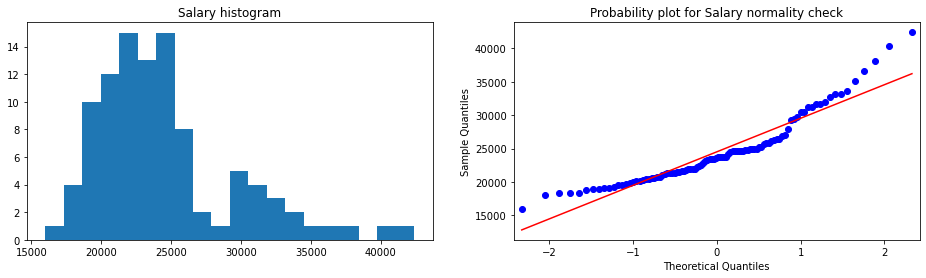

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4)) 

ax1.set_title('Salary histogram')
ax1.hist(df_empl['SALARY'], bins=20)

ax2.set_title('Probability plot for Salary normality check')
qqplot(df_empl['SALARY'], line='r', ax=ax2)

plt.show()

<span style="color:blue">
Вывод: распределение зарплат не похоже на нормальный закон, т.к. у гистограммы имеется тяжелый хвост справа. Кроме того, на квантильном графике точки сильно отклоняются от прямой.
</span>

In [41]:
# Критерии Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера для проверки на соответствие нормальному распределению
pvalues = [stats.kstest(df_empl['SALARY'], stats.norm(*stats.norm.fit(df_empl['SALARY'])).cdf)[1],
            stats.shapiro(df_empl['SALARY'])[1],
            stats.jarque_bera(df_empl['SALARY'])[1]]

print('P-value для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:\n')
print(pvalues)

P-value для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:

[0.01698505923931981, 1.6645467439957429e-06, 4.011000820369759e-08]


In [42]:
# Критерий Андерсона-Дарлинга для проверки на соответствие нормальному распределению
stats.anderson(df_empl['SALARY'], dist='norm')

AndersonResult(statistic=3.0036985166536283, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<span style="color:blue">
Вывод: в критериях Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера p-value < 5%, а в критерии Андерсона-Дарлинга statistic > critical_value при том же уровне значимости. Таким образом, нулевая гипотеза о соответствии нормальному распределению отвергается при данном уровне значимости.
</span>

**Упражнение 2 (30 баллов).** Раньше люди часто пользовались табицами случайных чисел (например, когда у них не было доступа к компьютеру с нужным статистическим софтом). Такие таблицы есть почти в любом учебнике по статистике. В книге М. Кадырова "Таблицы случайных чисел"  (Ташкент, 1936) приведены 2000 4-х значных псевдослучайных чисел. 1-я цифра оказалась нулем у 160, тройкой - у 247, шестеркой - у 191, девяткой - у 185 (остальные 1217 чисел начинались с других цифр). Стоит ли пользоваться такой таблицей?

In [43]:
obs = np.array([160/2000, 247/2000, 191/2000, 185/2000, 1217/2000])
exp = np.array([1/10, 1/10, 1/10, 1/10, 6/10])

obs = obs*2000
exp = exp*2000

# Критерий хи-квадрат
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=20.815833333333337, pvalue=0.0003444336417994683)

<span style="color:blue">
Вывод: p-value < 5%, поэтому нулевая гипотеза о соответствии теоретическому распределению отвергается при данном уровне значимости, и значит такой таблицей пользоваться нельзя. 
</span>

**Упражнение 3 (40 баллов).** Методом перебора найдите наиболее подходящий тип распределения для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить представление о форме плотности распределения. Затем изучите квантильные графики для разных распределений. Если будет такая возможность, порпобуйте применить какие-то критерии согласия.

In [44]:
df_sample = pd.read_csv('sample.csv')
df_sample.head()

,Sample
0,0.416099
1,10.767169
2,7.598518
3,4.407626
4,3.381943


In [45]:
df_sample.describe()

,Sample
count,100.000000
mean,3.825389
std,3.255657
min,0.003851
25%,1.498980
50%,3.342138
75%,4.814318
max,14.578639


<AxesSubplot:title={'center':'Sample histogram'}, ylabel='Frequency'>

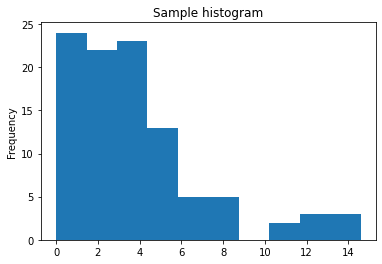

In [46]:
df_sample['Sample'].plot.hist(title = 'Sample histogram')

<span style="color:blue">
Вывод: гистограмма не соответствует, как минимум, равномерному распределению, поэтому его можно сразу отбросить.
</span>

### 1. Проверка на соответствие нормальному распределению

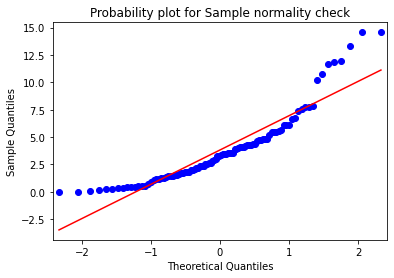

In [47]:
# Квантальный график для проверки на соответствие нормальному распределению
ax = plt.subplot()
plt.title('Probability plot for Sample normality check')
qqplot(df_sample['Sample'], line='r', ax=ax)
plt.show()

In [48]:
# Критерии Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера для проверки на соответствие нормальному распределению
pvalues = [stats.kstest(df_sample['Sample'], stats.norm(*stats.norm.fit(df_sample['Sample'])).cdf)[1],
            stats.shapiro(df_sample['Sample'])[1],
            stats.jarque_bera(df_sample['Sample'])[1]]

print('P-value для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:\n')
print(pvalues)

P-value для критериев Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера:

[0.04585040476240576, 3.6403054792799594e-08, 3.732014697277464e-12]


In [49]:
# Критерий Андерсона-Дарлинга для проверки на соответствие нормальному распределению
stats.anderson(df_sample['Sample'], dist='norm')

AndersonResult(statistic=3.5696770756482152, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<span style="color:blue">
Вывод: в критериях Колмогорова-Смирнова, Шапиро-Уилка и Харке-Бера p-value < 5%, а в критерии Андерсона-Дарлинга statistic > critical_value при том же уровне значимости. Таким образом, нулевая гипотеза о соответствии нормальному распределению отвергается при данном уровне значимости.
</span>

### 2. Проверка на соответствие распределению Лапласа

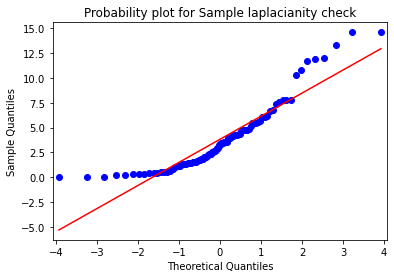

In [50]:
# Квантальный график для проверки на соответствие распределению Лапласа
ax = plt.subplot()
plt.title('Probability plot for Sample laplacianity check')
qqplot(df_sample['Sample'], dist=stats.laplace, line='r', ax=ax)
plt.show()

In [51]:
# Критерий Колмогорова-Смирнова для проверки на соответствие распределению Лапласа
stats.kstest(df_sample['Sample'], stats.laplace(*stats.laplace.fit(df_sample['Sample'])).cdf)

KstestResult(statistic=0.11988712942638292, pvalue=0.1038747426806107)

<span style="color:blue">
Вывод: p-value > 5%, однако точки на квантильном графике сильно отклоняются от прямой, поэтому нулевая гипотеза о соответствии распределению Лапласа отвергается.
</span>

### 3. Проверка на соответствие экспоненциальному распределению

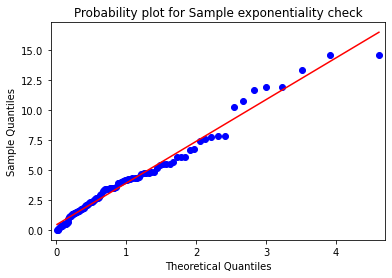

In [52]:
# Квантильный график для проверки на соответствие экспоненциальному распределению
ax = plt.subplot()
plt.title('Probability plot for Sample exponentiality check')
qqplot(df_sample['Sample'], dist=stats.expon, line='r', ax=ax)
plt.show()

In [53]:
# Критерий Колмогорова-Смирнова для проверки на соответствие экспоненциальному распределению
stats.kstest(df_sample['Sample'], stats.expon(*stats.expon.fit(df_sample['Sample'])).cdf)

KstestResult(statistic=0.09771189068891123, pvalue=0.2769270773863072)

In [54]:
# Критерий Андерсона-Дарлинга для проверки на соответствие экспоненциальному распределению
stats.anderson(df_sample['Sample'], dist='expon')

AndersonResult(statistic=1.2524656314059257, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

<span style="color:blue">
Вывод: в критерии Колмогорова-Смирнова p-value > 5%, а в критерии Андерсона-Дарлинга statistic < critical_value при том же уровне значимости. Кроме того, почти все точки на квантильном графике лежат на одной прямой. Таким образом, нулевая гипотеза о соответствии экспоненциальному распределению не отвергается при данном уровне значимости.
</span>